Accuracy (Polynomial Kernel):  70.00
F1 (Polynomial Kernel):  69.67

Accuracy (RBF Kernel):  70.00
F1 (RBF Kernel):  69.67


Decision Boundary - SVM with Polynomial Kernel:


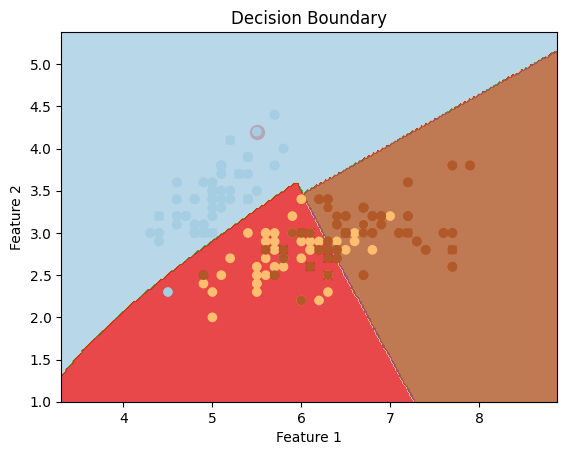


Decision Boundary - SVM with Gaussian RBF Kernel:


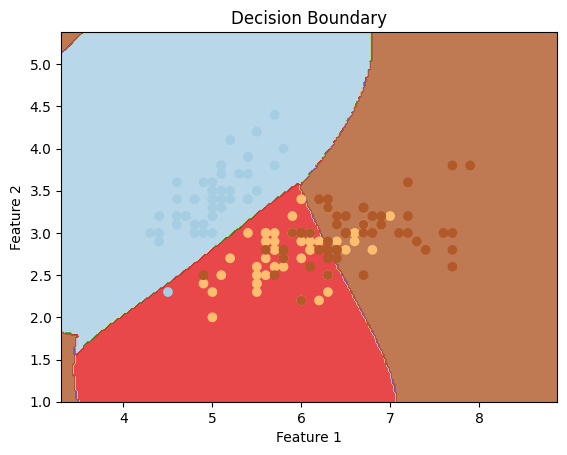

In [22]:
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, f1_score
import matplotlib.pyplot as plt

def plot_decision_boundary(model, X, y):
    h = 0.02  # Step size in the mesh
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title('Decision Boundary')
    plt.show()

# Loading the Iris dataset
iris = datasets.load_iris()
X = iris.data[:, :2]
y = iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=101)

# Gaussian RBF Kernel
rbf = SVC(kernel='rbf', gamma=0.5, C=1.0).fit(X_train, y_train)

# Polynomial Kernel
poly = SVC(kernel='poly', degree=3, C=1.0).fit(X_train, y_train)

# Testing
poly_pred = poly.predict(X_test)
rbf_pred = rbf.predict(X_test)

# Accuracy and f1 scores for SVM with Polynomial kernel
poly_accuracy = accuracy_score(y_test, poly_pred)
poly_f1 = f1_score(y_test, poly_pred, average='weighted')
print('Accuracy (Polynomial Kernel): ', "%.2f" % (poly_accuracy * 100))
print('F1 (Polynomial Kernel): ', "%.2f" % (poly_f1 * 100))
print("")

# Accuracy and f1 scores for SVM with Gaussian RBF Kernel
rbf_accuracy = accuracy_score(y_test, rbf_pred)
rbf_f1 = f1_score(y_test, rbf_pred, average='weighted')
print('Accuracy (RBF Kernel): ', "%.2f" % (rbf_accuracy * 100))
print('F1 (RBF Kernel): ', "%.2f" % (rbf_f1 * 100))
print("")


plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=plt.cm.Paired, label='Train Data')
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=plt.cm.Paired, marker='x', label='Test Data')


sample_index = 0  # Changeable
sample = X_test[sample_index]
plt.scatter(sample[0], sample[1], c='red', marker='o', s=100, label='Selected Sample')

print("")
print('Decision Boundary - SVM with Polynomial Kernel:')
plot_decision_boundary(poly, X, y)
print("")

print('Decision Boundary - SVM with Gaussian RBF Kernel:')
plot_decision_boundary(rbf, X, y)
print("")
